# Clustering and Its Types

## 1. What is Clustering?
Clustering is an **unsupervised machine learning technique** used to group similar data points together. It helps find patterns and structures in data without predefined labels.

### **How Clustering Works:**
- It identifies patterns in data and groups similar points together.
- It does not require labeled data, making it useful for exploratory data analysis.
- It helps in identifying underlying structures within data.

### **Real-Life Example:**
Imagine a shopping mall analyzing customer behavior. Based on spending habits, age, and interests, the mall can group customers into different clusters, such as:
- **Students** – Prefer budget-friendly items and fast food.
- **Working Professionals** – Prefer formal wear and electronic gadgets.
- **Senior Citizens** – Prefer health-related products.

This helps the mall in targeted advertising and store layout planning.

---

# 2. K-Means Clustering
K-Means is a **centroid-based clustering algorithm** that divides data into **K** clusters by minimizing the distance between points and cluster centers.

## **How It Works:**
1. **Choose the number of clusters (K).** This is predetermined by the user.
2. **Randomly place K cluster centers (centroids).** These act as the initial reference points.
3. **Assign each data point to the nearest centroid.** Each point belongs to the cluster whose centroid is closest.
4. **Compute new centroids.** Take the mean of all points in each cluster to update the centroid position.
5. **Repeat steps 3 & 4 until centroids stop changing.** The algorithm converges when cluster assignments no longer change significantly.

## **Real-Life Example:**
Imagine an e-commerce platform that groups users based on their purchasing behavior:
- **Tech Enthusiasts** – Buy gadgets and electronic items frequently.
- **Fashion Shoppers** – Purchase clothes and accessories regularly.
- **Grocery Shoppers** – Prefer daily essentials and home needs.

Using K-Means clustering, the platform can suggest relevant products to different customer segments.

## **Advantages:**
✅ Simple and fast for large datasets.  
✅ Works well when clusters are well-separated.  
✅ Easy to interpret and implement.

## **Disadvantages:**
❌ Sensitive to the number of clusters (K) – Choosing the wrong K may lead to poor results.  
❌ Does not work well with non-spherical clusters – It assumes clusters are circular in shape.  
❌ Affected by outliers – A few extreme values can shift centroids incorrectly.

---

# 4. Real-Life Use Cases of Clustering
✔️ **Customer Segmentation in Marketing:** Helps businesses understand different customer groups for targeted campaigns.  
✔️ **Document or News Classification:** Clusters similar articles together for easier organization.  
✔️ **Image Segmentation in Medical Imaging:** Used to identify tumors in MRI scans.  
✔️ **Anomaly Detection in Cybersecurity:** Detects unusual patterns in network traffic to find potential threats.  
✔️ **Recommendation Systems:** Netflix, Spotify, and Amazon use clustering to suggest relevant content or products.

---

# 5. Key Points to Remember
- **Clustering is an unsupervised learning technique** that groups similar data points together.
- **K-Means is a centroid-based method**, fast but requires a predefined number of clusters.
- **Hierarchical clustering creates a tree structure** and does not need a predefined K value.
- **Choosing the right clustering method depends on the dataset size, shape of clusters, and computational cost.**


# K means clustering

# importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# 🔹 Breaking it Down:
- **`dataset`** – This is a Pandas DataFrame that contains your dataset.
- **`.iloc[:, [3, 4]]`** – The `.iloc[]` method is used to select specific rows and columns:
  - The colon (`:`) means **all rows** are selected.
  - `[3, 4]` means **columns at index 3 and 4** are selected.
- **`.values`** – Converts the selected columns into a **NumPy array**.

---

# 🔹 How It Works:
- This extracts only the **4th and 5th columns** (indexing starts from 0) from the dataset.
- The result `X` is stored as a **NumPy array**, which is useful for machine learning models.

---

# 🔹 Example Dataset:
| ID | Name  | Age | Salary ($) | Spending Score |
|----|------|----|------------|----------------|
| 1  | John  | 25 | 50000      | 70             |
| 2  | Alice | 30 | 60000      | 60             |
| 3  | Mark  | 35 | 55000      | 80             |

---

# 🔹 Code Execution:
```python
X = dataset.iloc[:, [3, 4]].values
print(X)


# Using the elbow method to find the optimal number of clusters

C:\Users\Sandeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sandeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sandeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sandeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

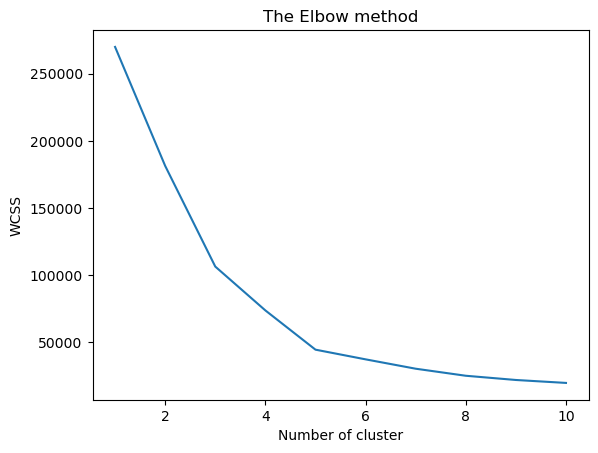

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

## Breaking It Down:

```python
wcss = []  # Stores the Within-Cluster Sum of Squares (WCSS) for different values of K

for i in range(1, 11):  # Looping from K=1 to K=10 to try different numbers of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)  # Creates a K-Means model with i clusters
    kmeans.fit(X)  # Trains the K-Means algorithm on dataset X
    wcss.append(kmeans.inertia_)  # Stores the WCSS (sum of squared distances to centroids)

plt.plot(range(1, 11), wcss)  # Plots WCSS values against different K values
plt.title('The Elbow Method')  # Adds a title to the plot
plt.xlabel('Number of Clusters')  # Labels the x-axis (number of clusters)
plt.ylabel('WCSS')  # Labels the y-axis (WCSS)
plt.show()  # Displays the graph
```

---

### 🔹 How It Works (Elbow Method)?
- The **Elbow Method** helps find the **optimal number of clusters (K)**.
- In the **WCSS vs. K plot**, we look for an **"elbow point"** where the WCSS value stops decreasing sharply.
- This point indicates the **best K value** (ideal number of clusters).

---

### 🔹 Real-Life Example:
📌 Suppose we are clustering **customers based on income and spending habits**:
- If **K is too small**, different customer groups may be **merged incorrectly**.
- If **K is too large**, we may **overfit the data**, creating **unnecessary small clusters**.
- **The Elbow Method helps select a K value** where adding more clusters does not significantly improve clustering.

---

### ✅ Key Takeaways:
✔️ **WCSS decreases** as K increases, but after a certain point, the decrease is **insignificant**.
✔️ The **"elbow" in the graph** suggests the best number of clusters.
✔️ This method ensures **better clustering performance** without unnecessary complexity.


# Training the K-Means model on the dataset

In [5]:
kmeans = KMeans(n_clusters=5,random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

C:\Users\Sandeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sandeep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

# Visualising the clusters

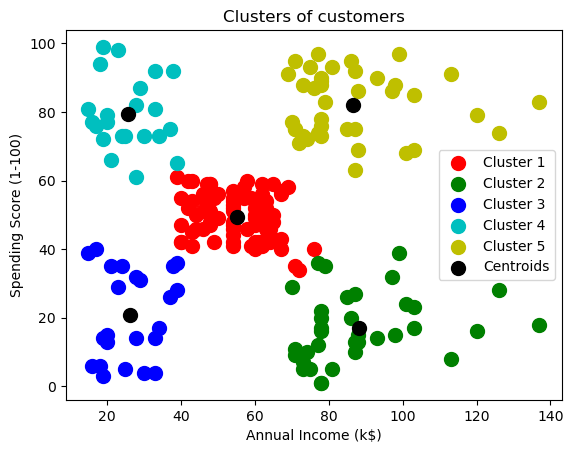

In [6]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s=100, c='r', label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s=100, c='g', label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s=100, c='b', label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1],s=100, c='c', label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1],s=100, c='y', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0],kmeans.cluster_centers_ [:,1] ,s=100, c='k', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 📌 Understanding `X[y_kmeans == 0, 0]` in K-Means Clustering

## **1️⃣ What Does This Expression Mean?**
The expression `X[y_kmeans == 0, 0]` is used in **NumPy** to **filter and extract** data points that belong to **Cluster 0** in a dataset.

### **Breaking It Down:**
🔹 **`y_kmeans == 0`**  
- `y_kmeans` contains **cluster labels** (e.g., `[0, 1, 2, 0, 1, 2, 0, 1, 2]`).  
- `y_kmeans == 0` creates a **Boolean mask**, meaning:
  - `True` for points in **Cluster 0**.
  - `False` for other points.

🔹 **`X[y_kmeans == 0]`**  
- Selects **only the rows** in `X` where the cluster label is `0`.

🔹 **`X[y_kmeans == 0, 0]`**  
- Extracts **only the first column (X-axis values)** of the points in Cluster 0.

🔹 **`X[y_kmeans == 0, 1]`**  
- Extracts **only the second column (Y-axis values)** of the points in Cluster 0.

---

## **2️⃣ Example Dataset:**
Let's say `X` represents **customer data** (e.g., Annual Income vs. Spending Score).

| Index | Annual Income (X-axis) | Spending Score (Y-axis) | Cluster Label (`y_kmeans`) |
|--------|-----------------|-----------------|--------------|
| 0      | 15             | 39              | 0            |
| 1      | 16             | 81              | 1            |
| 2      | 17             | 6               | 2            |
| 3      | 18             | 77              | 0            |
| 4      | 19             | 40              | 1            |

---

## **3️⃣ Applying `X[y_kmeans == 0, 0]`**
- `y_kmeans == 0` → selects **rows with Cluster 0** (`Index 0 and 3`).
- `X[y_kmeans == 0, 0]` → picks **Annual Income** (`[15, 18]`).
- `X[y_kmeans == 0, 1]` → picks **Spending Score** (`[39, 77]`).

---

## **4️⃣ Scatter Plot Explanation**
```python
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='r', label='Cluster 1')
